In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy
import pandas as pd
import csv
from datetime import datetime
import time
import math

In [2]:
def stamp_to_time(s):
	d=datetime.strptime(s,"%Y-%m-%d %H:%M:%S")
	t=time.mktime(d.timetuple())
	return t
#similarity function
def similarity(vector1, vector2):
	a=np.array(vector1)
	b=np.array(vector2)
	euclid = math.sqrt(np.sum(((a - b)**2)))
	return euclid

#normalized similarity function
def similarity_normalized(vector1,vector2):
	a=np.array(vector1)
	b=np.array(vector2)
	a=a/math.sqrt(np.sum(a**2))
	b=b/math.sqrt(np.sum(b**2))
	#print(a)
	#print(b)
	#print(a-b)
	euclid = math.sqrt(np.sum(((a - b)**2)))
	return euclid


In [3]:
def encoder(station_id):
    num=map_stations[station_id]
    encod=[0 for i in range(len(map_stations))]
    encod[num]=1
    map_stations[station_id]=encod
 

In [4]:
map_stations={'28079004':0,'28079008':1,'28079011':2,'28079016':3,
          '28079017':4,'28079018':5,'28079024':6,'28079027':7,
         '28079035':8,'28079036':9,'28079038':10,'28079039':11,
         '28079040':12,'28079047':13,'28079048':14,'28079049':15,
         '28079050':16,'28079054':17,'28079055':18,'28079056':19,
         '28079057':20,'28079058':21,'28079059':22,'28079060':23}

for key,val in map_stations.items():
    encoder(key)

In [5]:
init_time_2016=stamp_to_time("2016-01-01 0:0:0")
init_time_2017=stamp_to_time("2017-01-01 0:0:0")
stamp_to_time("2017-01-01 23:0:0")-init_time_2017

82800.0

In [6]:
data_1=[]
data_2=[]

In [7]:
reader=csv.reader(open('madrid_2015.csv','r'))
print("CSV Loaded")
for row in reader:
    if(row[0]!='date' and stamp_to_time(row[0])==init_time_2016):
        temp=[(stamp_to_time(row[0])-init_time_2016)]
        temp+=map_stations[row[13]]
        temp+=row[1:8]
        temp+=row[10:13]
        temp+=row[8:10] #target_variables
        temp=np.array(temp)
        np.place(temp,temp=='',np.nan)
        for val in range(len(temp)):
            if(temp[val]!='nan'):
                temp[val]=float(temp[val])
        #print(temp)
        data_1.append(temp)     

CSV Loaded


In [8]:
reader=csv.reader(open('madrid_2016.csv','r'))
print("CSV Loaded")
for row in reader:
    if(row[0]!='date'):
        temp=[(stamp_to_time(row[0])-init_time_2016)]
        temp+=map_stations[row[13]]
        temp+=row[1:8]
        temp+=row[10:13]
        temp+=row[8:10] #target_variables
        temp=np.array(temp)
        np.place(temp,temp=='',np.nan)
        #print(temp)
        for val in range(len(temp)):
            if(temp[val]!='nan'):
                temp[val]=float(temp[val])
        data_1.append(temp)

CSV Loaded


In [9]:
data_1=np.array(data_1)

In [10]:
reader=csv.reader(open('madrid_2017.csv','r'))
print("CSV Loaded")
for row in reader:
    if(row[0]!='date' and (stamp_to_time(row[0])-init_time_2017<=86200)):
        temp=[(stamp_to_time(row[0])-init_time_2016)]
        temp+=map_stations[row[15]]
        temp+=[row[1]]
        temp+=row[3:8]
        temp+=[row[9]]
        temp+=row[12:15]
        temp+=row[10:12] #target_variables
        temp=np.array(temp)
        np.place(temp,temp=='',np.nan)
        #print(temp)
        for val in range(len(temp)):
            if(temp[val]!='nan'):
                temp[val]=float(temp[val])
        data_2.append(temp)

CSV Loaded


In [16]:
data_2=np.array(data_2)
print(data_2.shape)

(552, 37)
31705200.0


In [12]:
data=np.concatenate((data_1,data_2),axis=0)
data=data.astype(float)

In [17]:
data[data[:,0].argsort()]
print(len(np.unique(data[:,0])))

8808


In [14]:
col_mean = np.nanmean(data, axis=0)
print(col_mean)
inds = np.where(np.isnan(data))
data[inds] = np.take(col_mean, inds[1])

[1.57715373e+07 4.19284817e-02 4.19284817e-02 4.19284817e-02
 4.19284817e-02 4.19284817e-02 3.99862904e-02 4.18142351e-02
 4.19284817e-02 4.04432766e-02 3.94150577e-02 4.19284817e-02
 4.19284817e-02 4.19284817e-02 4.19284817e-02 4.19284817e-02
 4.19284817e-02 4.19284817e-02 4.19284817e-02 4.19284817e-02
 4.19284817e-02 4.19284817e-02 4.16999886e-02 4.19284817e-02
 4.19284817e-02 6.33736932e-01 3.55291696e-01 3.74015033e-01
 1.24437447e-01 2.20901955e+01 3.85841962e+01 4.89811454e+01
 7.69484020e+00 1.37202941e+00 2.56508477e+00 1.91650382e+01
 1.04203674e+01]


In [18]:
#ROLLING_WINDOW
t1=time.time()
se_10=0.0
se_25=0.0
test_start=len(data)-576
train_start=0
k_vals=[i for i in range(1,10000)]
k_vals_to_predict10={}
k_vals_to_predict25={}
for i in k_vals:
        k_vals_to_predict10[i]=[]
        k_vals_to_predict25[i]=[]
while(test_start<len(data)):
    if(test_start%10==0):
        print(test_start)
    neigbours=[]
    predict_pm10=0.0
    predict_pm25=0.0
    for i in range(train_start,test_start):
        tup=(similarity(data[i,1:-2],data[test_start,1:-2]),i)
        neigbours.append(tup)
    
    neigbours=sorted(neigbours)
    for k in range(max(k_vals)+1):
        
        predict_pm10+=data[neigbours[k][1]][35]
        predict_pm25+=data[neigbours[k][1]][36]    
        if(k in k_vals):
            k_vals_to_predict10[k].append(predict_pm10/k)
            k_vals_to_predict25[k].append(predict_pm25/k)
    test_start+=1
    train_start+=1
print(time.time()-t1)

209500
209510
209520
209530
209540
209550
209560
209570
209580
209590
209600
209610
209620
209630
209640
209650
209660
209670
209680
209690
209700
209710
209720
209730
209740
209750
209760
209770
209780
209790
209800
209810
209820
209830
209840
209850
209860
209870
209880
209890
209900
209910
209920
209930
209940
209950
209960
209970
209980
209990
210000
210010
210020
210030
210040
210050
210060
210070
1217.39907193


7.30531550087
(array([118]),)


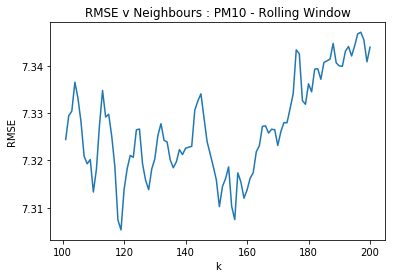

In [46]:
#ROLLING WINDOW RMSE VS K for PM10
from sklearn.metrics import mean_squared_error
x_plot=[]
rmse=[]
for key,val in (sorted(k_vals_to_predict10.items())):
    x_plot.append(key)
    rmse.append(math.sqrt(mean_squared_error(val,data[-576:,35])))
plt.xlabel('k')
plt.ylabel('RMSE')
plt.title('RMSE v Neighbours : PM10 - Rolling Window')

plt.plot(x_plot[100:200],rmse[100:200])
plt.savefig('rolling_10_zoomed.png')
print(min(rmse))
print(np.where(rmse==np.min(rmse)))

7.11323933817
(array([4]),)


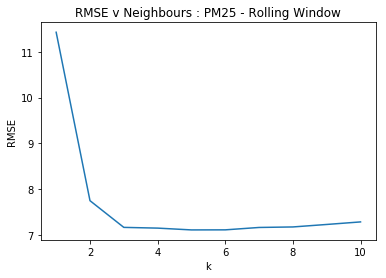

In [49]:
#ROLLING WINDOW RMSE VS K for PM25
from sklearn.metrics import mean_squared_error
x_plot=[]
rmse=[]
for key,val in (sorted(k_vals_to_predict25.items())):
    x_plot.append(key)
    rmse.append(math.sqrt(mean_squared_error(val,data[-576:,36])))
plt.xlabel('k')
plt.ylabel('RMSE')
plt.title('RMSE v Neighbours : PM25 - Rolling Window')

plt.plot(x_plot[:10],rmse[:10])
plt.savefig('rolling_25_zoomed.png')
print(min(rmse))
print(np.where(rmse==np.min(rmse)))

In [21]:
#RECURSIVE_WINDOW
t1=time.time()
se_10=0.0
se_25=0.0
test_start=len(data)-576
train_start=0
k_vals=[i for i in range(1,10000)]
k_vals_to_predict10_rec={}
k_vals_to_predict25_rec={}
for i in k_vals:
        k_vals_to_predict10_rec[i]=[]
        k_vals_to_predict25_rec[i]=[]
while(test_start<len(data)):
    if(test_start%10==0):
        print(test_start)
    neigbours=[]
    predict_pm10=0.0
    predict_pm25=0.0
    for i in range(train_start,test_start):
        tup=(similarity(data[i,1:-2],data[test_start,1:-2]),i)
        neigbours.append(tup)
    
    neigbours=sorted(neigbours)
    for k in range(max(k_vals)+1):
        
        predict_pm10+=data[neigbours[k][1]][35]
        predict_pm25+=data[neigbours[k][1]][36]    
        
        if(k in k_vals):
            k_vals_to_predict10_rec[k].append(predict_pm10/k)
            k_vals_to_predict25_rec[k].append(predict_pm25/k)
    test_start+=1
    #train_start+=1
print(time.time()-t1)

209500
209510
209520
209530
209540
209550
209560
209570
209580
209590
209600
209610
209620
209630
209640
209650
209660
209670
209680
209690
209700
209710
209720
209730
209740
209750
209760
209770
209780
209790
209800
209810
209820
209830
209840
209850
209860
209870
209880
209890
209900
209910
209920
209930
209940
209950
209960
209970
209980
209990
210000
210010
210020
210030
210040
210050
210060
210070
1307.1829679


7.30645223908
(array([117]),)


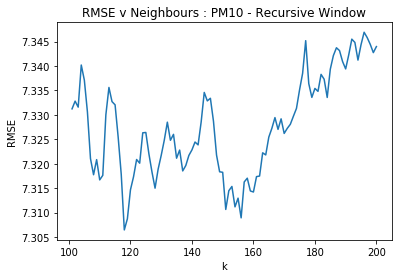

In [50]:
#RECURSIVE WINDOW RMSE VS K for PM10
from sklearn.metrics import mean_squared_error
x_plot=[]
rmse=[]
for key,val in (sorted(k_vals_to_predict10_rec.items())):
    
    x_plot.append(key)
    rmse.append(math.sqrt(mean_squared_error(val,data[-576:,35])))
plt.xlabel('k')
plt.ylabel('RMSE')
plt.title('RMSE v Neighbours : PM10 - Recursive Window')

plt.plot(x_plot[100:200],rmse[100:200])
plt.savefig('recursive_10_zoomed.png')
print(min(rmse))
print(np.where(rmse==np.min(rmse)))

7.10487585445
(array([4]),)


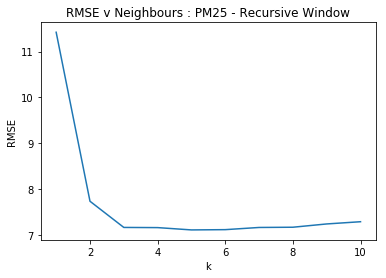

In [51]:
#RECURSIVE WINDOW RMSE VS K for PM25
from sklearn.metrics import mean_squared_error
x_plot=[]
rmse=[]
for key,val in (sorted(k_vals_to_predict25_rec.items())):

    x_plot.append(key)
    rmse.append(math.sqrt(mean_squared_error(val,data[-576:,36])))
plt.xlabel('k')
plt.ylabel('RMSE')
plt.title('RMSE v Neighbours : PM25 - Recursive Window')

plt.plot(x_plot[:10],rmse[:10])
plt.savefig('recursive_25_zoomed.png')
print(min(rmse))
print(np.where(rmse==np.min(rmse)))

In [24]:
#ROLLING_WINDOW_NORMALIZED
t1=time.time()
se_10=0.0
se_25=0.0
test_start=len(data)-576
train_start=0
k_vals=[i for i in range(1,10000)]
k_vals_to_predict10n={}
k_vals_to_predict25n={}
for i in k_vals:
        k_vals_to_predict10n[i]=[]
        k_vals_to_predict25n[i]=[]
while(test_start<len(data)):
    if(test_start%10==0):
        print(test_start)
    neigbours=[]
    predict_pm10=0.0
    predict_pm25=0.0
    for i in range(train_start,test_start):
        tup=(similarity_normalized(data[i,1:-2],data[test_start,1:-2]),i)
        neigbours.append(tup)
    
    neigbours=sorted(neigbours)
    for k in range(max(k_vals)+1):
       
        predict_pm10+=data[neigbours[k][1]][35]
        predict_pm25+=data[neigbours[k][1]][36]    
        
        if(k in k_vals):
            
            k_vals_to_predict10n[k].append(predict_pm10/k)
            k_vals_to_predict25n[k].append(predict_pm25/k)
            
    test_start+=1
    train_start+=1
print(time.time()-t1)

209500
209510
209520
209530
209540
209550
209560
209570
209580
209590
209600
209610
209620
209630
209640
209650
209660
209670
209680
209690
209700
209710
209720
209730
209740
209750
209760
209770
209780
209790
209800
209810
209820
209830
209840
209850
209860
209870
209880
209890
209900
209910
209920
209930
209940
209950
209960
209970
209980
209990
210000
210010
210020
210030
210040
210050
210060
210070
2305.70786905


7.13086551318
(array([312]),)


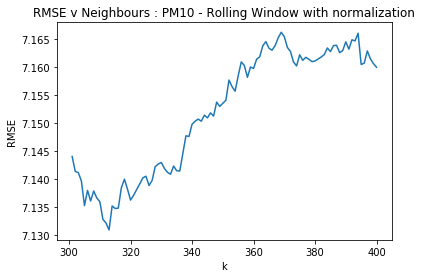

In [52]:
#ROLLING WINDOW RMSE VS K for PM10 NORMALIZED
from sklearn.metrics import mean_squared_error
x_plot=[]
rmse=[]
for key,val in (sorted(k_vals_to_predict10n.items())):
    x_plot.append(key)
    rmse.append(math.sqrt(mean_squared_error(val,data[-576:,35])))
plt.xlabel('k')
plt.ylabel('RMSE')
plt.title('RMSE v Neighbours : PM10 - Rolling Window with normalization')
plt.plot(x_plot[300:400],rmse[300:400])
plt.savefig('rolling_10_norm_zoomed.png')

print(min(rmse))
print(np.where(rmse==np.min(rmse)))

7.09783664371
(array([4]),)


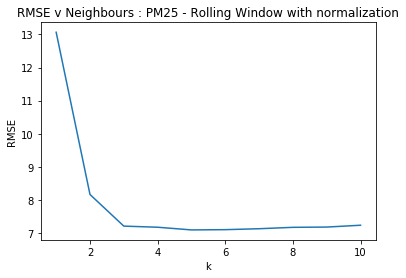

In [53]:
#ROLLING WINDOW RMSE VS K for PM25 NORMALIZED
from sklearn.metrics import mean_squared_error
x_plot=[]
rmse=[]
for key,val in (sorted(k_vals_to_predict25n.items())):
    x_plot.append(key)
    rmse.append(math.sqrt(mean_squared_error(val,data[-576:,36])))
plt.xlabel('k')
plt.ylabel('RMSE')
plt.title('RMSE v Neighbours : PM25 - Rolling Window with normalization')
plt.plot(x_plot[:10],rmse[:10])
plt.savefig('rolling_25_norm_zoomed.png')

print(min(rmse))
print(np.where(rmse==np.min(rmse)))

In [32]:
#RECURSIVE_WINDOW NORMALIZED
t1=time.time()
se_10=0.0
se_25=0.0
test_start=len(data)-576
train_start=0
k_vals=[i for i in range(1,10000)]
k_vals_to_predict10_recn={}
k_vals_to_predict25_recn={}
for i in k_vals:
        k_vals_to_predict10_recn[i]=[]
        k_vals_to_predict25_recn[i]=[]
while(test_start<len(data)):
    if(test_start%10==0):
        print(test_start)
    neigbours=[]
    predict_pm10=0.0
    predict_pm25=0.0
    for i in range(train_start,test_start):
        tup=(similarity_normalized(data[i,1:-2],data[test_start,1:-2]),i)
        neigbours.append(tup)
    
    neigbours=sorted(neigbours)
    for k in range(max(k_vals)+1):
       
        predict_pm10+=data[neigbours[k][1]][35]
        predict_pm25+=data[neigbours[k][1]][36]    
        
        if(k in k_vals):
            k_vals_to_predict10_recn[k].append(predict_pm10/k)
            k_vals_to_predict25_recn[k].append(predict_pm25/k)
            
    test_start+=1
    #train_start+=1
print(time.time()-t1)

209500
209510
209520
209530
209540
209550
209560
209570
209580
209590
209600
209610
209620
209630
209640
209650
209660
209670
209680
209690
209700
209710
209720
209730
209740
209750
209760
209770
209780
209790
209800
209810
209820
209830
209840
209850
209860
209870
209880
209890
209900
209910
209920
209930
209940
209950
209960
209970
209980
209990
210000
210010
210020
210030
210040
210050
210060
210070
4135.27698517


7.13205041643
(array([312]),)


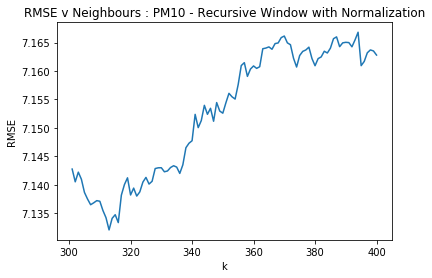

In [54]:
#RECURSIVE WINDOW RMSE VS K for PM10 NORMALIZED
from sklearn.metrics import mean_squared_error
x_plot=[]
rmse=[]
for key,val in (sorted(k_vals_to_predict10_recn.items())):
    
    x_plot.append(key)
    rmse.append(math.sqrt(mean_squared_error(val,data[-576:,35])))
plt.xlabel('k')
plt.ylabel('RMSE')
plt.title('RMSE v Neighbours : PM10 - Recursive Window with Normalization')
plt.plot(x_plot[300:400],rmse[300:400])
plt.savefig('recursive_10_norm_zoomed.png')

print(min(rmse))
print(np.where(rmse==np.min(rmse)))

7.08436009968
(array([4]),)


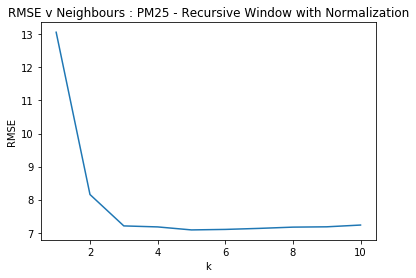

In [55]:
#RECURSIVE WINDOW RMSE VS K for PM25 NORMALIZED
from sklearn.metrics import mean_squared_error
x_plot=[]
rmse=[]
for key,val in (sorted(k_vals_to_predict25_recn.items())):

    x_plot.append(key)
    rmse.append(math.sqrt(mean_squared_error(val,data[-576:,36])))
plt.xlabel('k')
plt.ylabel('RMSE')
plt.title('RMSE v Neighbours : PM25 - Recursive Window with Normalization')
plt.plot(x_plot[:10],rmse[:10])
plt.savefig('recursive_25_norm_zoomed.png')
print(min(rmse))
print(np.where(rmse==np.min(rmse)))